In [ ]:
import numpy as np
from scipy.integrate import odeint

# Install required Python packages if not already installed
# You can uncomment the following lines if running locally and need to install packages
# !pip install scipy matplotlib

import matplotlib.pyplot as plt


In [3]:
def SICZ(x, t, parameters):
    # Extract state variables
    S, I, C, Z = x
    N = S + I + C

    # Extract parameters
    beta_p = parameters['beta_p']  # transmission
    beta_c = parameters['beta_c']  # transmission from carcass
    beta_z = parameters['beta_z']  # transmission from zoospore pool
    a = parameters['a']            # disease induced death rate
    lamdaC = parameters['lamdaC']  # decay of carcass
    sigma = parameters['sigma']    # shed rate from infected
    mu = parameters['mu']          # shed rate from carcass
    lamdaZ = parameters['lamdaZ']  # decay rate of zoospores
    r = parameters['r']            # recovery rate

    # Differential equations
    dS = -(S * beta_p * (I / N)) - (S * beta_c * C) - (S * beta_z * Z)
    dI = (S * beta_p * (I / N)) + (S * beta_c * C) + (S * beta_z * Z) - (I * a)
    dC = (I * a) - (C * lamdaC)
    dZ = (I * sigma) + (C * mu) - (Z * lamdaZ)

    return [dS, dI, dC, dZ]


In [4]:
import pandas as pd

# Define initial conditions for each population size
initial_cond_Large = [999, 1, 0, 0]   # S, I, C, Z
initial_cond_Med = [99, 1, 0, 0]
initial_cond_Small = [9, 1, 0, 0]

# Print initial conditions for verification
print("Large:", initial_cond_Large)
print("Medium:", initial_cond_Med)
print("Small:", initial_cond_Small)

# Define time points (365 days)
times = np.linspace(0, 365, 365)

# Define parameters as a dictionary
params = {
    "beta_p": 0.023,
    "beta_c": 0.023,
    "beta_z": 0.0001,
    "lamdaC": 1/4,
    "lamdaZ": 1/21.6,
    "sigma": 0.001,
    "mu": 0.01,
    "a": 1/26.5,
    "r": 0  # Add recovery rate if needed by your model
}
print("Parameters:", params)

# Solve ODE for each population size
resultsSICZLarge = odeint(SICZ, initial_cond_Large, times, args=(params,))
resultsSICZSmall = odeint(SICZ, initial_cond_Small, times, args=(params,))
resultsSICZMed = odeint(SICZ, initial_cond_Med, times, args=(params,))

# Convert results to pandas DataFrame for easier handling
resultsSICZLarge = pd.DataFrame(resultsSICZLarge, columns=['S', 'I', 'C', 'Z'])
resultsSICZLarge['time'] = times

resultsSICZSmall = pd.DataFrame(resultsSICZSmall, columns=['S', 'I', 'C', 'Z'])
resultsSICZSmall['time'] = times

resultsSICZMed = pd.DataFrame(resultsSICZMed, columns=['S', 'I', 'C', 'Z'])
resultsSICZMed['time'] = times

Large: [999, 1, 0, 0]
Medium: [99, 1, 0, 0]
Small: [9, 1, 0, 0]
Parameters: {'beta_p': 0.023, 'beta_c': 0.023, 'beta_z': 0.0001, 'lamdaC': 0.25, 'lamdaZ': 0.046296296296296294, 'sigma': 0.001, 'mu': 0.01, 'a': 0.03773584905660377, 'r': 0}


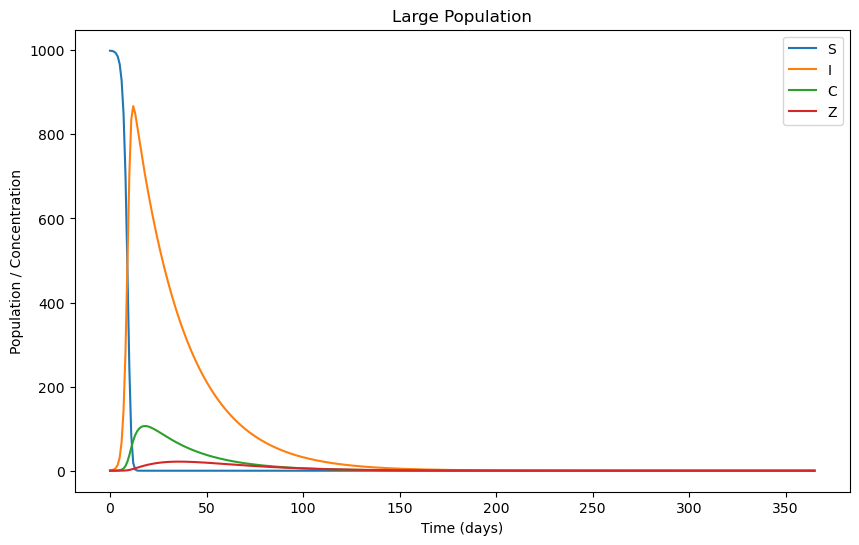

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(resultsSICZLarge['time'], resultsSICZLarge['S'], label='S')
plt.plot(resultsSICZLarge['time'], resultsSICZLarge['I'], label='I')
plt.plot(resultsSICZLarge['time'], resultsSICZLarge['C'], label='C')
plt.plot(resultsSICZLarge['time'], resultsSICZLarge['Z'], label='Z')
plt.title("Large Population")
plt.xlabel("Time (days)")
plt.ylabel("Population / Concentration")
plt.legend()
plt.show()

In [ ]:
Plot_exp_Med<-ggplot(resultsSICZMed)+geom_line(aes(x=time, y=S, color='S')) + 
  geom_line(aes(x=time, y=I, color='I'))+ 
  geom_line(aes(x=time, y=C, color='C'))+
  geom_line(aes(x=time, y=Z, color='Z'))+ggtitle("Medium Population")
Plot_exp_Med

In [ ]:
Plot_exp_Small<-ggplot(resultsSICZSmall)+geom_line(aes(x=time, y=S, color='S')) + 
  geom_line(aes(x=time, y=I, color='I'))+ 
  geom_line(aes(x=time, y=C, color='C'))+
  geom_line(aes(x=time, y=Z, color='Z'))+ggtitle("Small Population")

Plot_exp_Small